In [1]:
#tutorial https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/
# https://stackoverflow.com/questions/52273543/creating-multiple-boxplots-on-the-same-graph-from-a-dictionary
# https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html
from time import sleep
import warnings
import requests
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from bs4 import BeautifulSoup
import os
from scipy.stats import ks_2samp
from scipy import stats
# La directory viene cambiata puntando alla directory padre per raggiungere più facilmente i risultati
os.chdir("..")

Confronto distribuzioni intere - con base complessiva

[Text(1, 0, 'Base'),
 Text(2, 0, 'Base \n+ Synthetic data \n(No DS injected)'),
 Text(3, 0, 'Casing'),
 Text(4, 0, 'Missing Value'),
 Text(5, 0, 'Suspect Sign')]

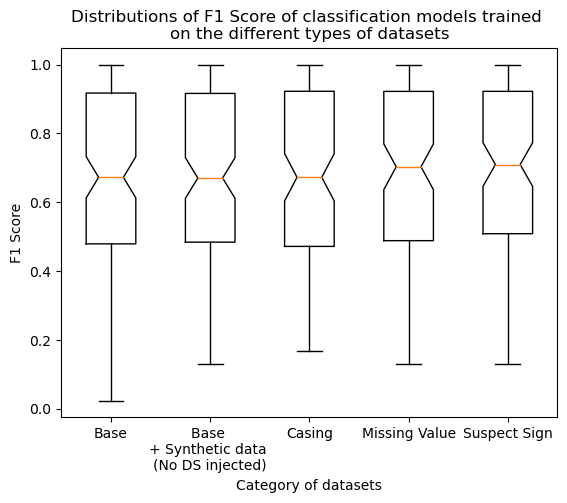

In [2]:

df_plot_base = pd.read_csv("./outputComparisons/Combined/General/base.csv", index_col= False)
df_plot_base_synthetic = pd.read_csv("./outputComparisons/Combined/General/base_synthetic.csv", index_col= False)
df_plot_casing= pd.read_csv("./outputComparisons/Combined/General/casing.csv", index_col= False)
df_plot_missingvalues= pd.read_csv("./outputComparisons/Combined/General/missing_values.csv", index_col= False)
df_plot_suspectsign = pd.read_csv("./outputComparisons/Combined/General/suspect_sign.csv", index_col= False)
df_plot_floatingpoint = pd.read_csv("./outputLazyPredict/FloatingPointNumberAsString/df_m_1/df_m_1_1.csv", index_col= False)
dict_df = {"Base" : list(df_plot_base["F1 Score"]), "Base \n+ Synthetic data \n(No DS injected)": list(df_plot_base_synthetic["F1 Score"]), "Casing": list(df_plot_casing["F1 Score"]), "Missing Value": list(df_plot_missingvalues["F1 Score"]), "Suspect Sign": list(df_plot_suspectsign["F1 Score"])}

_, box = plt.subplots()
box.boxplot(dict_df.values(), 1)
box.set_title("Distributions of F1 Score of classification models trained \non the different types of datasets")
box.set_xlabel("Category of datasets")
box.set_ylabel("F1 Score")
box.set_xticklabels(dict_df.keys())

In [3]:
print("F1 Score - Differences using Kolmogorov-Smirnov Test")
if(ks_2samp(df_plot_base["F1 Score"], df_plot_base_synthetic["F1 Score"]).pvalue < 0.05):
    print("Base vs Base+Synthetic - pvalue: ", ks_2samp(df_plot_base["F1 Score"], df_plot_base_synthetic["F1 Score"]).pvalue)
if(ks_2samp(df_plot_base["F1 Score"], df_plot_casing["F1 Score"]).pvalue < 0.05):
    print("Base vs Casing - pvalue: ", ks_2samp(df_plot_base["F1 Score"], df_plot_casing["F1 Score"]).pvalue)
if(ks_2samp(df_plot_base["F1 Score"], df_plot_missingvalues["F1 Score"]).pvalue < 0.05):
    print("Base vs Missing Value - pvalue: ", ks_2samp(df_plot_base["F1 Score"], df_plot_missingvalues["F1 Score"]).pvalue)
if(ks_2samp(df_plot_base["F1 Score"], df_plot_suspectsign["F1 Score"]).pvalue < 0.05):
    print("Base vs Suspect Sign - pvalue: ", ks_2samp(df_plot_base["F1 Score"], df_plot_suspectsign["F1 Score"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["F1 Score"], df_plot_casing["F1 Score"]).pvalue < 0.05):
    print("Base+Synthetic vs Casing - pvalue: ", ks_2samp(df_plot_base_synthetic["F1 Score"], df_plot_casing["F1 Score"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["F1 Score"], df_plot_missingvalues["F1 Score"]).pvalue < 0.05):
    print("Base+Synthetic vs Missing Value - pvalue: ", ks_2samp(df_plot_base_synthetic["F1 Score"], df_plot_missingvalues["F1 Score"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["F1 Score"], df_plot_suspectsign["F1 Score"]).pvalue < 0.05):
    print("Base+Synthetic vs Suspect Sign - pvalue: ", ks_2samp(df_plot_base_synthetic["F1 Score"], df_plot_suspectsign["F1 Score"]).pvalue)

F1 Score - Differences using Kolmogorov-Smirnov Test


In [4]:
print(stats.shapiro(df_plot_base["F1 Score"]))
print(stats.shapiro(df_plot_base_synthetic["F1 Score"]))
print(stats.shapiro(df_plot_casing["F1 Score"]))
print(stats.shapiro(df_plot_suspectsign["F1 Score"]))
print(stats.shapiro(df_plot_missingvalues["F1 Score"]))
#p-value minore di 0.05, ipotesi che abbiano distribuzione normale è rigettata

ShapiroResult(statistic=0.9181584119796753, pvalue=6.855404421912681e-07)
ShapiroResult(statistic=0.91655433177948, pvalue=5.499351232174376e-07)
ShapiroResult(statistic=0.8666437864303589, pvalue=2.562276968376409e-08)
ShapiroResult(statistic=0.8779820203781128, pvalue=8.529841011295503e-08)
ShapiroResult(statistic=0.8698441386222839, pvalue=3.884153443323157e-08)


[Text(1, 0, 'Base'),
 Text(2, 0, 'Base \n+ Synthetic data \n(No DS injected)'),
 Text(3, 0, 'Casing'),
 Text(4, 0, 'Missing Value'),
 Text(5, 0, 'Suspect Sign')]

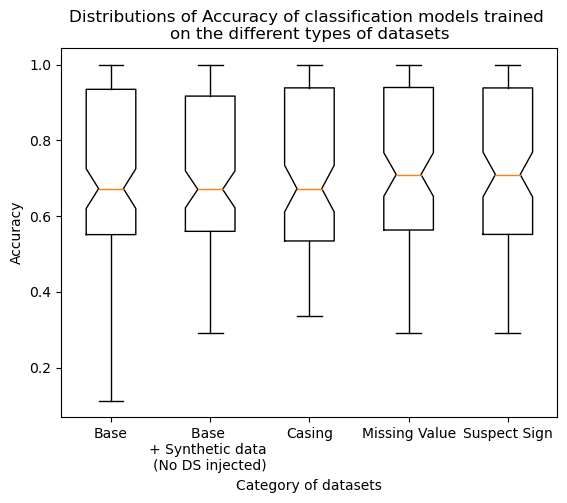

In [5]:

df_plot_base = pd.read_csv("./outputComparisons/Combined/General/base.csv", index_col= False)
df_plot_base_synthetic = pd.read_csv("./outputComparisons/Combined/General/base_synthetic.csv", index_col= False)
df_plot_casing= pd.read_csv("./outputComparisons/Combined/General/casing.csv", index_col= False)
df_plot_missingvalues= pd.read_csv("./outputComparisons/Combined/General/missing_values.csv", index_col= False)
df_plot_suspectsign = pd.read_csv("./outputComparisons/Combined/General/suspect_sign.csv", index_col= False)
df_plot_floatingpoint = pd.read_csv("./outputLazyPredict/FloatingPointNumberAsString/df_m_1/df_m_1_1.csv", index_col= False)
dict_df = {"Base" : list(df_plot_base["Accuracy"]), "Base \n+ Synthetic data \n(No DS injected)": list(df_plot_base_synthetic["Accuracy"]), "Casing": list(df_plot_casing["Accuracy"]), "Missing Value": list(df_plot_missingvalues["Accuracy"]), "Suspect Sign": list(df_plot_suspectsign["Accuracy"])}

_, box = plt.subplots()
box.boxplot(dict_df.values(), 1)
box.set_title("Distributions of Accuracy of classification models trained \non the different types of datasets")
box.set_xlabel("Category of datasets")
box.set_ylabel("Accuracy")
box.set_xticklabels(dict_df.keys())

In [6]:
print("Accuracy - Differences using Kolmogorov-Smirnov Test")
if(ks_2samp(df_plot_base["Accuracy"], df_plot_base_synthetic["Accuracy"]).pvalue < 0.05):
    print("Base vs Base+Synthetic - pvalue: ", ks_2samp(df_plot_base["Accuracy"], df_plot_base_synthetic["Accuracy"]).pvalue)
if(ks_2samp(df_plot_base["Accuracy"], df_plot_casing["Accuracy"]).pvalue < 0.05):
    print("Base vs Casing - pvalue: ", ks_2samp(df_plot_base["Accuracy"], df_plot_casing["Accuracy"]).pvalue)
if(ks_2samp(df_plot_base["Accuracy"], df_plot_missingvalues["Accuracy"]).pvalue < 0.05):
    print("Base vs Missing Value - pvalue: ", ks_2samp(df_plot_base["Accuracy"], df_plot_missingvalues["Accuracy"]).pvalue)
if(ks_2samp(df_plot_base["Accuracy"], df_plot_suspectsign["Accuracy"]).pvalue < 0.05):
    print("Base vs Suspect Sign - pvalue: ", ks_2samp(df_plot_base["Accuracy"], df_plot_suspectsign["Accuracy"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["Accuracy"], df_plot_casing["Accuracy"]).pvalue < 0.05):
    print("Base+Synthetic vs Casing - pvalue: ", ks_2samp(df_plot_base_synthetic["Accuracy"], df_plot_casing["Accuracy"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["Accuracy"], df_plot_missingvalues["Accuracy"]).pvalue < 0.05):
    print("Base+Synthetic vs Missing Value - pvalue: ", ks_2samp(df_plot_base_synthetic["Accuracy"], df_plot_missingvalues["Accuracy"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["Accuracy"], df_plot_suspectsign["Accuracy"]).pvalue < 0.05):
    print("Base+Synthetic vs Suspect Sign - pvalue: ", ks_2samp(df_plot_base_synthetic["Accuracy"], df_plot_suspectsign["Accuracy"]).pvalue)

Accuracy - Differences using Kolmogorov-Smirnov Test


[Text(1, 0, 'Base'),
 Text(2, 0, 'Base \n+ Synthetic data \n(No DS injected)'),
 Text(3, 0, 'Casing'),
 Text(4, 0, 'Missing Value'),
 Text(5, 0, 'Suspect Sign')]

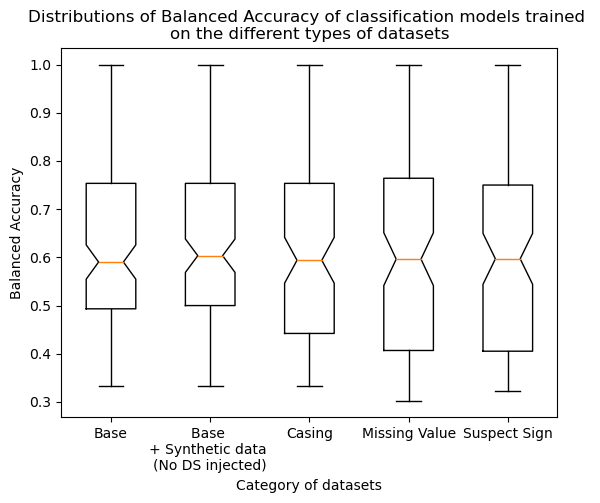

In [7]:
df_plot_base = pd.read_csv("./outputComparisons/Combined/General/base.csv", index_col= False)
df_plot_base_synthetic = pd.read_csv("./outputComparisons/Combined/General/base_synthetic.csv", index_col= False)
df_plot_casing= pd.read_csv("./outputComparisons/Combined/General/casing.csv", index_col= False)
df_plot_missingvalues= pd.read_csv("./outputComparisons/Combined/General/missing_values.csv", index_col= False)
df_plot_suspectsign = pd.read_csv("./outputComparisons/Combined/General/suspect_sign.csv", index_col= False)
df_plot_floatingpoint = pd.read_csv("./outputLazyPredict/FloatingPointNumberAsString/df_m_1/df_m_1_1.csv", index_col= False)
dict_df = {"Base" : list(df_plot_base["Balanced Accuracy"]), "Base \n+ Synthetic data \n(No DS injected)": list(df_plot_base_synthetic["Balanced Accuracy"]), "Casing": list(df_plot_casing["Balanced Accuracy"]), "Missing Value": list(df_plot_missingvalues["Balanced Accuracy"]), "Suspect Sign": list(df_plot_suspectsign["Balanced Accuracy"])}

_, box = plt.subplots()
box.boxplot(dict_df.values(), 1)
box.set_title("Distributions of Balanced Accuracy of classification models trained \non the different types of datasets")
box.set_xlabel("Category of datasets")
box.set_ylabel("Balanced Accuracy")
box.set_xticklabels(dict_df.keys())

In [8]:
print("Balanced Accuracy - Differences using Kolmogorov-Smirnov Test")
if(ks_2samp(df_plot_base["Balanced Accuracy"], df_plot_base_synthetic["Balanced Accuracy"]).pvalue < 0.05):
    print("Base vs Base+Synthetic - pvalue: ", ks_2samp(df_plot_base["Balanced Accuracy"], df_plot_base_synthetic["Balanced Accuracy"]).pvalue)
if(ks_2samp(df_plot_base["Balanced Accuracy"], df_plot_casing["Balanced Accuracy"]).pvalue < 0.05):
    print("Base vs Casing - pvalue: ", ks_2samp(df_plot_base["Balanced Accuracy"], df_plot_casing["Balanced Accuracy"]).pvalue)
if(ks_2samp(df_plot_base["Balanced Accuracy"], df_plot_missingvalues["Balanced Accuracy"]).pvalue < 0.05):
    print("Base vs Missing Value - pvalue: ", ks_2samp(df_plot_base["Balanced Accuracy"], df_plot_missingvalues["Balanced Accuracy"]).pvalue)
if(ks_2samp(df_plot_base["Balanced Accuracy"], df_plot_suspectsign["Balanced Accuracy"]).pvalue < 0.05):
    print("Base vs Suspect Sign - pvalue: ", ks_2samp(df_plot_base["Balanced Accuracy"], df_plot_suspectsign["Balanced Accuracy"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["Balanced Accuracy"], df_plot_casing["Balanced Accuracy"]).pvalue < 0.05):
    print("Base+Synthetic vs Casing - pvalue: ", ks_2samp(df_plot_base_synthetic["Balanced Accuracy"], df_plot_casing["Balanced Accuracy"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["Balanced Accuracy"], df_plot_missingvalues["Balanced Accuracy"]).pvalue < 0.05):
    print("Base+Synthetic vs Missing Value - pvalue: ", ks_2samp(df_plot_base_synthetic["Balanced Accuracy"], df_plot_missingvalues["Balanced Accuracy"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["Balanced Accuracy"], df_plot_suspectsign["Balanced Accuracy"]).pvalue < 0.05):
    print("Base+Synthetic vs Suspect Sign - pvalue: ", ks_2samp(df_plot_base_synthetic["Balanced Accuracy"], df_plot_suspectsign["Balanced Accuracy"]).pvalue)

Balanced Accuracy - Differences using Kolmogorov-Smirnov Test


[Text(1, 0, 'Base'),
 Text(2, 0, 'Base \n+ Synthetic data \n(No DS injected)'),
 Text(3, 0, 'Casing'),
 Text(4, 0, 'Missing Value'),
 Text(5, 0, 'Suspect Sign')]

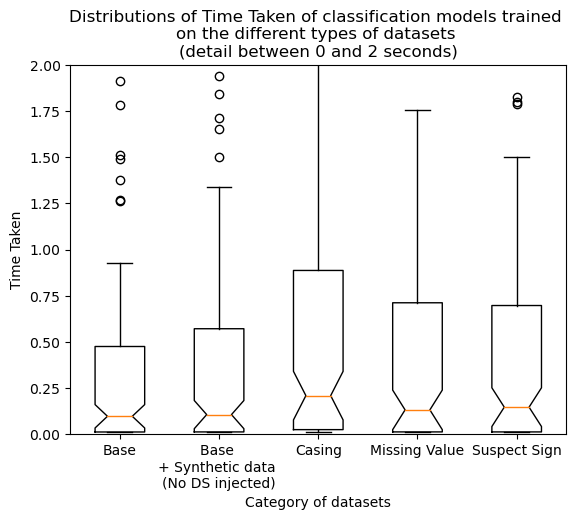

In [9]:
df_plot_base = pd.read_csv("./outputComparisons/Combined/General/base.csv", index_col= False)
df_plot_base_synthetic = pd.read_csv("./outputComparisons/Combined/General/base_synthetic.csv", index_col= False)
df_plot_casing= pd.read_csv("./outputComparisons/Combined/General/casing.csv", index_col= False)
df_plot_missingvalues= pd.read_csv("./outputComparisons/Combined/General/missing_values.csv", index_col= False)
df_plot_suspectsign = pd.read_csv("./outputComparisons/Combined/General/suspect_sign.csv", index_col= False)
df_plot_floatingpoint = pd.read_csv("./outputLazyPredict/FloatingPointNumberAsString/df_m_1/df_m_1_1.csv", index_col= False)
dict_df = {"Base" : list(df_plot_base["Time Taken"]), "Base \n+ Synthetic data \n(No DS injected)": list(df_plot_base_synthetic["Time Taken"]), "Casing": list(df_plot_casing["Time Taken"]), "Missing Value": list(df_plot_missingvalues["Time Taken"]), "Suspect Sign": list(df_plot_suspectsign["Time Taken"])}

_, box = plt.subplots()
box.boxplot(dict_df.values(), 1)
box.set_title("Distributions of Time Taken of classification models trained \non the different types of datasets \n(detail between 0 and 2 seconds)")
box.set_xlabel("Category of datasets")
box.set_ylabel("Time Taken")
box.set_ylim(0, 2)
box.set_xticklabels(dict_df.keys())

In [10]:
print("Time Taken - Differences using Kolmogorov-Smirnov Test")
if(ks_2samp(df_plot_base["Time Taken"], df_plot_base_synthetic["Time Taken"]).pvalue < 0.05):
    print("Base vs Base+Synthetic - pvalue: ", ks_2samp(df_plot_base["Time Taken"], df_plot_base_synthetic["Time Taken"]).pvalue)
if(ks_2samp(df_plot_base["Time Taken"], df_plot_casing["Time Taken"]).pvalue < 0.05):
    print("Base vs Casing - pvalue: ", ks_2samp(df_plot_base["Time Taken"], df_plot_casing["Time Taken"]).pvalue)
if(ks_2samp(df_plot_base["Time Taken"], df_plot_missingvalues["Time Taken"]).pvalue < 0.05):
    print("Base vs Missing Value - pvalue: ", ks_2samp(df_plot_base["Time Taken"], df_plot_missingvalues["Time Taken"]).pvalue)
if(ks_2samp(df_plot_base["Time Taken"], df_plot_suspectsign["Time Taken"]).pvalue < 0.05):
    print("Base vs Suspect Sign - pvalue: ", ks_2samp(df_plot_base["Time Taken"], df_plot_suspectsign["Time Taken"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["Time Taken"], df_plot_casing["Time Taken"]).pvalue < 0.05):
    print("Base+Synthetic vs Casing - pvalue: ", ks_2samp(df_plot_base_synthetic["Time Taken"], df_plot_casing["Time Taken"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["Time Taken"], df_plot_missingvalues["Time Taken"]).pvalue < 0.05):
    print("Base+Synthetic vs Missing Value - pvalue: ", ks_2samp(df_plot_base_synthetic["Time Taken"], df_plot_missingvalues["Time Taken"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["Time Taken"], df_plot_suspectsign["Time Taken"]).pvalue < 0.05):
    print("Base+Synthetic vs Suspect Sign - pvalue: ", ks_2samp(df_plot_base_synthetic["Time Taken"], df_plot_suspectsign["Time Taken"]).pvalue)

Time Taken - Differences using Kolmogorov-Smirnov Test


Confronto distribuzioni intere - con dataset con feature numeriche

[Text(1, 0, 'Base'),
 Text(2, 0, 'Base \n+ Synthetic data \n(No DS injected)'),
 Text(3, 0, 'Missing Value'),
 Text(4, 0, 'Suspect Sign')]

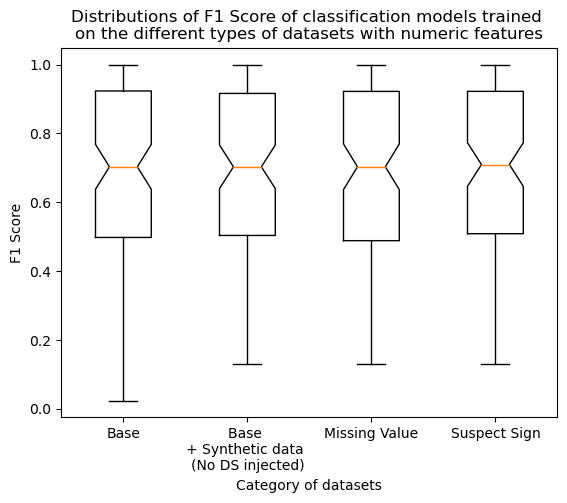

In [11]:

df_plot_base = pd.read_csv("./outputComparisons/Combined/General/base_numeric.csv", index_col= False)
df_plot_base_synthetic = pd.read_csv("./outputComparisons/Combined/General/base_synthetic_numeric.csv", index_col= False)
df_plot_missingvalues= pd.read_csv("./outputComparisons/Combined/General/missing_values.csv", index_col= False)
df_plot_suspectsign = pd.read_csv("./outputComparisons/Combined/General/suspect_sign.csv", index_col= False)
df_plot_floatingpoint = pd.read_csv("./outputLazyPredict/FloatingPointNumberAsString/df_m_1/df_m_1_1.csv", index_col= False)
dict_df = {"Base" : list(df_plot_base["F1 Score"]), "Base \n+ Synthetic data \n(No DS injected)": list(df_plot_base_synthetic["F1 Score"]), "Missing Value": list(df_plot_missingvalues["F1 Score"]), "Suspect Sign": list(df_plot_suspectsign["F1 Score"])}

_, box = plt.subplots()
box.boxplot(dict_df.values(), 1)
box.set_title("Distributions of F1 Score of classification models trained \non the different types of datasets with numeric features")
box.set_xlabel("Category of datasets")
box.set_ylabel("F1 Score")
box.set_xticklabels(dict_df.keys())

In [12]:
print("F1 Score - Differences using Kolmogorov-Smirnov Test")
if(ks_2samp(df_plot_base["F1 Score"], df_plot_base_synthetic["F1 Score"]).pvalue < 0.05):
    print("Base vs Base+Synthetic - pvalue: ", ks_2samp(df_plot_base["F1 Score"], df_plot_base_synthetic["F1 Score"]).pvalue)
if(ks_2samp(df_plot_base["F1 Score"], df_plot_missingvalues["F1 Score"]).pvalue < 0.05):
    print("Base vs Missing Value - pvalue: ", ks_2samp(df_plot_base["F1 Score"], df_plot_missingvalues["F1 Score"]).pvalue)
if(ks_2samp(df_plot_base["F1 Score"], df_plot_suspectsign["F1 Score"]).pvalue < 0.05):
    print("Base vs Suspect Sign - pvalue: ", ks_2samp(df_plot_base["F1 Score"], df_plot_suspectsign["F1 Score"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["F1 Score"], df_plot_missingvalues["F1 Score"]).pvalue < 0.05):
    print("Base+Synthetic vs Missing Value - pvalue: ", ks_2samp(df_plot_base_synthetic["F1 Score"], df_plot_missingvalues["F1 Score"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["F1 Score"], df_plot_suspectsign["F1 Score"]).pvalue < 0.05):
    print("Base+Synthetic vs Suspect Sign - pvalue: ", ks_2samp(df_plot_base_synthetic["F1 Score"], df_plot_suspectsign["F1 Score"]).pvalue)

F1 Score - Differences using Kolmogorov-Smirnov Test


In [13]:
print(stats.shapiro(df_plot_base["F1 Score"]))
print(stats.shapiro(df_plot_base_synthetic["F1 Score"]))
print(stats.shapiro(df_plot_suspectsign["F1 Score"]))
print(stats.shapiro(df_plot_missingvalues["F1 Score"]))
#p-value minore di 0.05, ipotesi che abbiano distribuzione normale è rigettata

ShapiroResult(statistic=0.875256359577179, pvalue=6.531521989927569e-08)
ShapiroResult(statistic=0.8639130592346191, pvalue=2.2306362978952166e-08)
ShapiroResult(statistic=0.8779820203781128, pvalue=8.529841011295503e-08)
ShapiroResult(statistic=0.8698441386222839, pvalue=3.884153443323157e-08)


[Text(1, 0, 'Base'),
 Text(2, 0, 'Base \n+ Synthetic data \n(No DS injected)'),
 Text(3, 0, 'Missing Value'),
 Text(4, 0, 'Suspect Sign')]

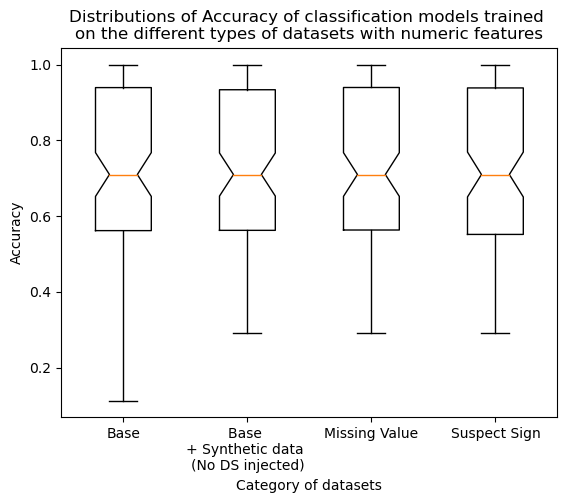

In [14]:

df_plot_base = pd.read_csv("./outputComparisons/Combined/General/base_numeric.csv", index_col= False)
df_plot_base_synthetic = pd.read_csv("./outputComparisons/Combined/General/base_synthetic_numeric.csv", index_col= False)
df_plot_missingvalues= pd.read_csv("./outputComparisons/Combined/General/missing_values.csv", index_col= False)
df_plot_suspectsign = pd.read_csv("./outputComparisons/Combined/General/suspect_sign.csv", index_col= False)
df_plot_floatingpoint = pd.read_csv("./outputLazyPredict/FloatingPointNumberAsString/df_m_1/df_m_1_1.csv", index_col= False)
dict_df = {"Base" : list(df_plot_base["Accuracy"]), "Base \n+ Synthetic data \n(No DS injected)": list(df_plot_base_synthetic["Accuracy"]), "Missing Value": list(df_plot_missingvalues["Accuracy"]), "Suspect Sign": list(df_plot_suspectsign["Accuracy"])}

_, box = plt.subplots()
box.boxplot(dict_df.values(), 1)
box.set_title("Distributions of Accuracy of classification models trained \non the different types of datasets with numeric features")
box.set_xlabel("Category of datasets")
box.set_ylabel("Accuracy")
box.set_xticklabels(dict_df.keys())

In [15]:
print("Accuracy - Differences using Kolmogorov-Smirnov Test")
if(ks_2samp(df_plot_base["Accuracy"], df_plot_base_synthetic["Accuracy"]).pvalue < 0.05):
    print("Base vs Base+Synthetic - pvalue: ", ks_2samp(df_plot_base["Accuracy"], df_plot_base_synthetic["Accuracy"]).pvalue)
if(ks_2samp(df_plot_base["Accuracy"], df_plot_missingvalues["Accuracy"]).pvalue < 0.05):
    print("Base vs Missing Value - pvalue: ", ks_2samp(df_plot_base["Accuracy"], df_plot_missingvalues["Accuracy"]).pvalue)
if(ks_2samp(df_plot_base["Accuracy"], df_plot_suspectsign["Accuracy"]).pvalue < 0.05):
    print("Base vs Suspect Sign - pvalue: ", ks_2samp(df_plot_base["Accuracy"], df_plot_suspectsign["Accuracy"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["Accuracy"], df_plot_missingvalues["Accuracy"]).pvalue < 0.05):
    print("Base+Synthetic vs Missing Value - pvalue: ", ks_2samp(df_plot_base_synthetic["Accuracy"], df_plot_missingvalues["Accuracy"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["Accuracy"], df_plot_suspectsign["Accuracy"]).pvalue < 0.05):
    print("Base+Synthetic vs Suspect Sign - pvalue: ", ks_2samp(df_plot_base_synthetic["Accuracy"], df_plot_suspectsign["Accuracy"]).pvalue)

Accuracy - Differences using Kolmogorov-Smirnov Test


[Text(1, 0, 'Base'),
 Text(2, 0, 'Base \n+ Synthetic data \n(No DS injected)'),
 Text(3, 0, 'Missing Value'),
 Text(4, 0, 'Suspect Sign')]

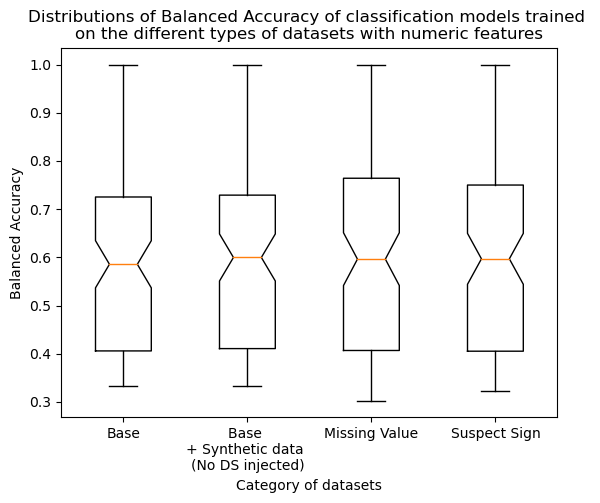

In [16]:

df_plot_base = pd.read_csv("./outputComparisons/Combined/General/base_numeric.csv", index_col= False)
df_plot_base_synthetic = pd.read_csv("./outputComparisons/Combined/General/base_synthetic_numeric.csv", index_col= False)
df_plot_missingvalues= pd.read_csv("./outputComparisons/Combined/General/missing_values.csv", index_col= False)
df_plot_suspectsign = pd.read_csv("./outputComparisons/Combined/General/suspect_sign.csv", index_col= False)
df_plot_floatingpoint = pd.read_csv("./outputLazyPredict/FloatingPointNumberAsString/df_m_1/df_m_1_1.csv", index_col= False)
dict_df = {"Base" : list(df_plot_base["Balanced Accuracy"]), "Base \n+ Synthetic data \n(No DS injected)": list(df_plot_base_synthetic["Balanced Accuracy"]), "Missing Value": list(df_plot_missingvalues["Balanced Accuracy"]), "Suspect Sign": list(df_plot_suspectsign["Balanced Accuracy"])}

_, box = plt.subplots()
box.boxplot(dict_df.values(), 1)
box.set_title("Distributions of Balanced Accuracy of classification models trained \non the different types of datasets with numeric features")
box.set_xlabel("Category of datasets")
box.set_ylabel("Balanced Accuracy")
box.set_xticklabels(dict_df.keys())

In [17]:
print("Balanced Accuracy - Differences using Kolmogorov-Smirnov Test")
if(ks_2samp(df_plot_base["Balanced Accuracy"], df_plot_base_synthetic["Balanced Accuracy"]).pvalue < 0.05):
    print("Base vs Base+Synthetic - pvalue: ", ks_2samp(df_plot_base["Balanced Accuracy"], df_plot_base_synthetic["Balanced Accuracy"]).pvalue)
if(ks_2samp(df_plot_base["Balanced Accuracy"], df_plot_missingvalues["Balanced Accuracy"]).pvalue < 0.05):
    print("Base vs Missing Value - pvalue: ", ks_2samp(df_plot_base["Balanced Accuracy"], df_plot_missingvalues["Balanced Accuracy"]).pvalue)
if(ks_2samp(df_plot_base["Balanced Accuracy"], df_plot_suspectsign["Balanced Accuracy"]).pvalue < 0.05):
    print("Base vs Suspect Sign - pvalue: ", ks_2samp(df_plot_base["Balanced Accuracy"], df_plot_suspectsign["Balanced Accuracy"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["Balanced Accuracy"], df_plot_missingvalues["Balanced Accuracy"]).pvalue < 0.05):
    print("Base+Synthetic vs Missing Value - pvalue: ", ks_2samp(df_plot_base_synthetic["Balanced Accuracy"], df_plot_missingvalues["Balanced Accuracy"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["Balanced Accuracy"], df_plot_suspectsign["Balanced Accuracy"]).pvalue < 0.05):
    print("Base+Synthetic vs Suspect Sign - pvalue: ", ks_2samp(df_plot_base_synthetic["Balanced Accuracy"], df_plot_suspectsign["Balanced Accuracy"]).pvalue)

Balanced Accuracy - Differences using Kolmogorov-Smirnov Test


[Text(1, 0, 'Base'),
 Text(2, 0, 'Base \n+ Synthetic data \n(No DS injected)'),
 Text(3, 0, 'Missing Value'),
 Text(4, 0, 'Suspect Sign')]

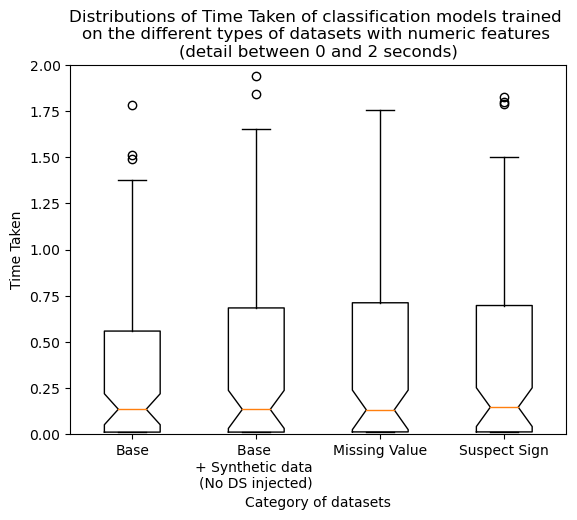

In [18]:

df_plot_base = pd.read_csv("./outputComparisons/Combined/General/base_numeric.csv", index_col= False)
df_plot_base_synthetic = pd.read_csv("./outputComparisons/Combined/General/base_synthetic_numeric.csv", index_col= False)
df_plot_missingvalues= pd.read_csv("./outputComparisons/Combined/General/missing_values.csv", index_col= False)
df_plot_suspectsign = pd.read_csv("./outputComparisons/Combined/General/suspect_sign.csv", index_col= False)
df_plot_floatingpoint = pd.read_csv("./outputLazyPredict/FloatingPointNumberAsString/df_m_1/df_m_1_1.csv", index_col= False)
dict_df = {"Base" : list(df_plot_base["Time Taken"]), "Base \n+ Synthetic data \n(No DS injected)": list(df_plot_base_synthetic["Time Taken"]), "Missing Value": list(df_plot_missingvalues["Time Taken"]), "Suspect Sign": list(df_plot_suspectsign["Time Taken"])}

_, box = plt.subplots()
box.boxplot(dict_df.values(), 1)
box.set_title("Distributions of Time Taken of classification models trained \non the different types of datasets with numeric features \n(detail between 0 and 2 seconds)")
box.set_xlabel("Category of datasets")
box.set_ylabel("Time Taken")
box.set_ylim(0, 2)
box.set_xticklabels(dict_df.keys())

In [19]:
print("Time Taken - Differences using Kolmogorov-Smirnov Test")
if(ks_2samp(df_plot_base["Time Taken"], df_plot_base_synthetic["Time Taken"]).pvalue < 0.05):
    print("Base vs Base+Synthetic - pvalue: ", ks_2samp(df_plot_base["Time Taken"], df_plot_base_synthetic["Time Taken"]).pvalue)
if(ks_2samp(df_plot_base["Time Taken"], df_plot_missingvalues["Time Taken"]).pvalue < 0.05):
    print("Base vs Missing Value - pvalue: ", ks_2samp(df_plot_base["Time Taken"], df_plot_missingvalues["Time Taken"]).pvalue)
if(ks_2samp(df_plot_base["Time Taken"], df_plot_suspectsign["Time Taken"]).pvalue < 0.05):
    print("Base vs Suspect Sign - pvalue: ", ks_2samp(df_plot_base["Time Taken"], df_plot_suspectsign["Time Taken"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["Time Taken"], df_plot_missingvalues["Time Taken"]).pvalue < 0.05):
    print("Base+Synthetic vs Missing Value - pvalue: ", ks_2samp(df_plot_base_synthetic["Time Taken"], df_plot_missingvalues["Time Taken"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["Time Taken"], df_plot_suspectsign["Time Taken"]).pvalue < 0.05):
    print("Base+Synthetic vs Suspect Sign - pvalue: ", ks_2samp(df_plot_base_synthetic["Time Taken"], df_plot_suspectsign["Time Taken"]).pvalue)

Time Taken - Differences using Kolmogorov-Smirnov Test


Confronto distribuzioni intere - con dataset con feature categoriche

[Text(1, 0, 'Base'),
 Text(2, 0, 'Base \n+ Synthetic data \n(No DS injected)'),
 Text(3, 0, 'Casing')]

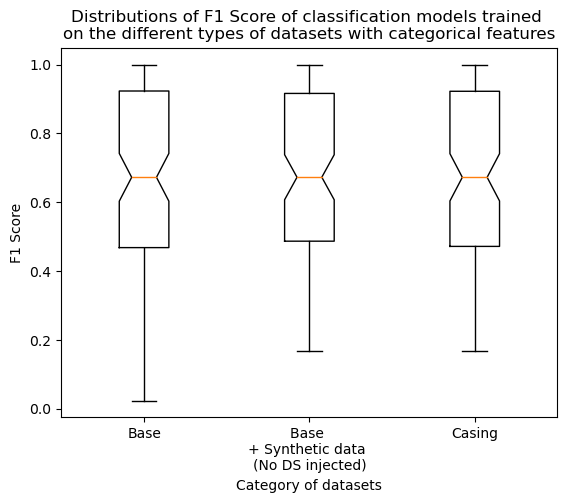

In [20]:
df_plot_base = pd.read_csv("./outputComparisons/Combined/General/base_casing.csv", index_col= False)
df_plot_base_synthetic = pd.read_csv("./outputComparisons/Combined/General/base_synthetic_casing.csv", index_col= False)
df_plot_casing= pd.read_csv("./outputComparisons/Combined/General/casing.csv", index_col= False)
df_plot_missingvalues= pd.read_csv("./outputComparisons/Combined/General/missing_values.csv", index_col= False)
df_plot_suspectsign = pd.read_csv("./outputComparisons/Combined/General/suspect_sign.csv", index_col= False)
df_plot_floatingpoint = pd.read_csv("./outputLazyPredict/FloatingPointNumberAsString/df_m_1/df_m_1_1.csv", index_col= False)
dict_df = {"Base" : list(df_plot_base["F1 Score"]), "Base \n+ Synthetic data \n(No DS injected)": list(df_plot_base_synthetic["F1 Score"]), "Casing": list(df_plot_casing["F1 Score"])}

_, box = plt.subplots()
box.boxplot(dict_df.values(), 1)
box.set_title("Distributions of F1 Score of classification models trained \non the different types of datasets with categorical features")
box.set_xlabel("Category of datasets")
box.set_ylabel("F1 Score")
box.set_xticklabels(dict_df.keys())

In [21]:
print("F1 Score - Differences using Kolmogorov-Smirnov Test")
if(ks_2samp(df_plot_base["F1 Score"], df_plot_base_synthetic["F1 Score"]).pvalue < 0.05):
    print("Base vs Base+Synthetic - pvalue: ", ks_2samp(df_plot_base["F1 Score"], df_plot_base_synthetic["F1 Score"]).pvalue)
if(ks_2samp(df_plot_base["F1 Score"], df_plot_casing["F1 Score"]).pvalue < 0.05):
    print("Base vs Casing - pvalue: ", ks_2samp(df_plot_base["F1 Score"], df_plot_casing["F1 Score"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["F1 Score"], df_plot_casing["F1 Score"]).pvalue < 0.05):
    print("Base+Synthetic vs Casing - pvalue: ", ks_2samp(df_plot_base_synthetic["F1 Score"], df_plot_casing["F1 Score"]).pvalue)

F1 Score - Differences using Kolmogorov-Smirnov Test


In [22]:
print(stats.shapiro(df_plot_base["F1 Score"]))
print(stats.shapiro(df_plot_base_synthetic["F1 Score"]))
print(stats.shapiro(df_plot_casing["F1 Score"]))
#p-value minore di 0.05, ipotesi che abbiano distribuzione normale è rigettata

ShapiroResult(statistic=0.8775953650474548, pvalue=7.351809472311288e-08)
ShapiroResult(statistic=0.8748239874839783, pvalue=5.601097896601459e-08)
ShapiroResult(statistic=0.8666437864303589, pvalue=2.562276968376409e-08)


[Text(1, 0, 'Base'),
 Text(2, 0, 'Base \n+ Synthetic data \n(No DS injected)'),
 Text(3, 0, 'Casing')]

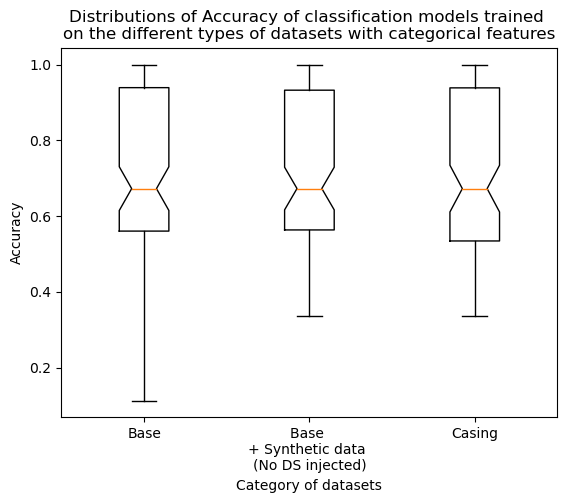

In [23]:
df_plot_base = pd.read_csv("./outputComparisons/Combined/General/base_casing.csv", index_col= False)
df_plot_base_synthetic = pd.read_csv("./outputComparisons/Combined/General/base_synthetic_casing.csv", index_col= False)
df_plot_casing= pd.read_csv("./outputComparisons/Combined/General/casing.csv", index_col= False)
df_plot_missingvalues= pd.read_csv("./outputComparisons/Combined/General/missing_values.csv", index_col= False)
df_plot_suspectsign = pd.read_csv("./outputComparisons/Combined/General/suspect_sign.csv", index_col= False)
df_plot_floatingpoint = pd.read_csv("./outputLazyPredict/FloatingPointNumberAsString/df_m_1/df_m_1_1.csv", index_col= False)
dict_df = {"Base" : list(df_plot_base["Accuracy"]), "Base \n+ Synthetic data \n(No DS injected)": list(df_plot_base_synthetic["Accuracy"]), "Casing": list(df_plot_casing["Accuracy"])}

_, box = plt.subplots()
box.boxplot(dict_df.values(), 1)
box.set_title("Distributions of Accuracy of classification models trained \non the different types of datasets with categorical features")
box.set_xlabel("Category of datasets")
box.set_ylabel("Accuracy")
box.set_xticklabels(dict_df.keys())

In [24]:
print("Accuracy - Differences using Kolmogorov-Smirnov Test")
if(ks_2samp(df_plot_base["Accuracy"], df_plot_base_synthetic["Accuracy"]).pvalue < 0.05):
    print("Base vs Base+Synthetic - pvalue: ", ks_2samp(df_plot_base["Accuracy"], df_plot_base_synthetic["Accuracy"]).pvalue)
if(ks_2samp(df_plot_base["Accuracy"], df_plot_casing["Accuracy"]).pvalue < 0.05):
    print("Base vs Casing - pvalue: ", ks_2samp(df_plot_base["Accuracy"], df_plot_casing["Accuracy"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["Accuracy"], df_plot_casing["Accuracy"]).pvalue < 0.05):
    print("Base+Synthetic vs Casing - pvalue: ", ks_2samp(df_plot_base_synthetic["Accuracy"], df_plot_casing["Accuracy"]).pvalue)

Accuracy - Differences using Kolmogorov-Smirnov Test


[Text(1, 0, 'Base'),
 Text(2, 0, 'Base \n+ Synthetic data \n(No DS injected)'),
 Text(3, 0, 'Casing')]

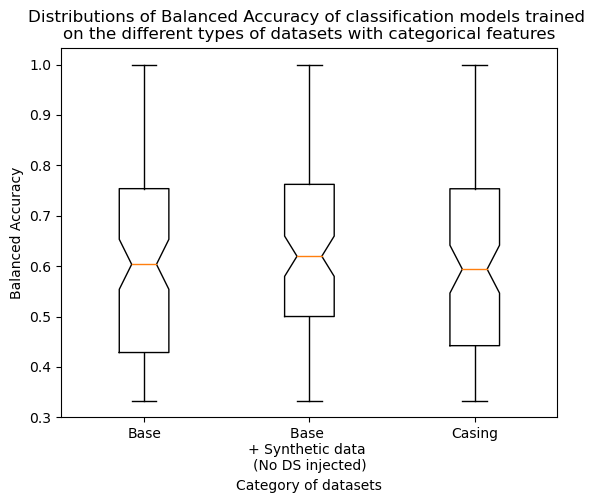

In [25]:
df_plot_base = pd.read_csv("./outputComparisons/Combined/General/base_casing.csv", index_col= False)
df_plot_base_synthetic = pd.read_csv("./outputComparisons/Combined/General/base_synthetic_casing.csv", index_col= False)
df_plot_casing= pd.read_csv("./outputComparisons/Combined/General/casing.csv", index_col= False)
df_plot_missingvalues= pd.read_csv("./outputComparisons/Combined/General/missing_values.csv", index_col= False)
df_plot_suspectsign = pd.read_csv("./outputComparisons/Combined/General/suspect_sign.csv", index_col= False)
df_plot_floatingpoint = pd.read_csv("./outputLazyPredict/FloatingPointNumberAsString/df_m_1/df_m_1_1.csv", index_col= False)
dict_df = {"Base" : list(df_plot_base["Balanced Accuracy"]), "Base \n+ Synthetic data \n(No DS injected)": list(df_plot_base_synthetic["Balanced Accuracy"]), "Casing": list(df_plot_casing["Balanced Accuracy"])}

_, box = plt.subplots()
box.boxplot(dict_df.values(), 1)
box.set_title("Distributions of Balanced Accuracy of classification models trained \non the different types of datasets with categorical features")
box.set_xlabel("Category of datasets")
box.set_ylabel("Balanced Accuracy")
box.set_xticklabels(dict_df.keys())

In [26]:
print("Balanced Accuracy - Differences using Kolmogorov-Smirnov Test")
if(ks_2samp(df_plot_base["Balanced Accuracy"], df_plot_base_synthetic["Balanced Accuracy"]).pvalue < 0.05):
    print("Base vs Base+Synthetic - pvalue: ", ks_2samp(df_plot_base["Balanced Accuracy"], df_plot_base_synthetic["Balanced Accuracy"]).pvalue)
if(ks_2samp(df_plot_base["Balanced Accuracy"], df_plot_casing["Balanced Accuracy"]).pvalue < 0.05):
    print("Base vs Casing - pvalue: ", ks_2samp(df_plot_base["Balanced Accuracy"], df_plot_casing["Balanced Accuracy"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["Balanced Accuracy"], df_plot_casing["Balanced Accuracy"]).pvalue < 0.05):
    print("Base+Synthetic vs Casing - pvalue: ", ks_2samp(df_plot_base_synthetic["Balanced Accuracy"], df_plot_casing["Balanced Accuracy"]).pvalue)

Balanced Accuracy - Differences using Kolmogorov-Smirnov Test


[Text(1, 0, 'Base'),
 Text(2, 0, 'Base \n+ Synthetic data \n(No DS injected)'),
 Text(3, 0, 'Casing')]

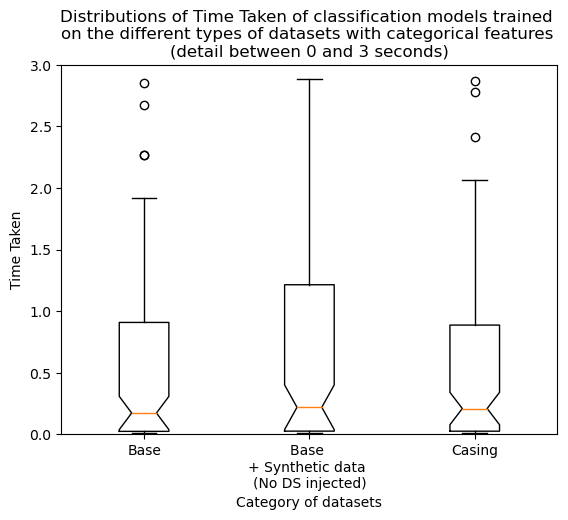

In [27]:
df_plot_base = pd.read_csv("./outputComparisons/Combined/General/base_casing.csv", index_col= False)
df_plot_base_synthetic = pd.read_csv("./outputComparisons/Combined/General/base_synthetic_casing.csv", index_col= False)
df_plot_casing= pd.read_csv("./outputComparisons/Combined/General/casing.csv", index_col= False)
df_plot_missingvalues= pd.read_csv("./outputComparisons/Combined/General/missing_values.csv", index_col= False)
df_plot_suspectsign = pd.read_csv("./outputComparisons/Combined/General/suspect_sign.csv", index_col= False)
df_plot_floatingpoint = pd.read_csv("./outputLazyPredict/FloatingPointNumberAsString/df_m_1/df_m_1_1.csv", index_col= False)
dict_df = {"Base" : list(df_plot_base["Time Taken"]), "Base \n+ Synthetic data \n(No DS injected)": list(df_plot_base_synthetic["Time Taken"]), "Casing": list(df_plot_casing["Time Taken"])}

_, box = plt.subplots()
box.boxplot(dict_df.values(), 1)
box.set_title("Distributions of Time Taken of classification models trained \non the different types of datasets with categorical features \n(detail between 0 and 3 seconds)")
box.set_xlabel("Category of datasets")
box.set_ylabel("Time Taken")
box.set_ylim(0, 3)
box.set_xticklabels(dict_df.keys())

In [28]:
print("Time Taken - Differences using Kolmogorov-Smirnov Test")
if(ks_2samp(df_plot_base["Time Taken"], df_plot_base_synthetic["Time Taken"]).pvalue < 0.05):
    print("Base vs Base+Synthetic - pvalue: ", ks_2samp(df_plot_base["Time Taken"], df_plot_base_synthetic["Time Taken"]).pvalue)
if(ks_2samp(df_plot_base["Time Taken"], df_plot_casing["Time Taken"]).pvalue < 0.05):
    print("Base vs Casing - pvalue: ", ks_2samp(df_plot_base["Time Taken"], df_plot_casing["Time Taken"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["Time Taken"], df_plot_casing["Time Taken"]).pvalue < 0.05):
    print("Base+Synthetic vs Casing - pvalue: ", ks_2samp(df_plot_base_synthetic["Time Taken"], df_plot_casing["Time Taken"]))
    print("Base Synthetic:\n",df_plot_base_synthetic["Time Taken"].describe())
    print("Casing:\n",df_plot_casing["Time Taken"].describe())

Time Taken - Differences using Kolmogorov-Smirnov Test
